In [3]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
df = df.ffill()
df.head(3)

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937


In [5]:
#한글 깨짐 해결
from matplotlib import font_manager, rc
# 한글 폰트 설정 (맑은 고딕 사용)
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\rapa\AppData\Local\Temp\ipykernel_24880\1247666942.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([col_years[i] for i in range(0,len(col_years),2)],rotation=90)


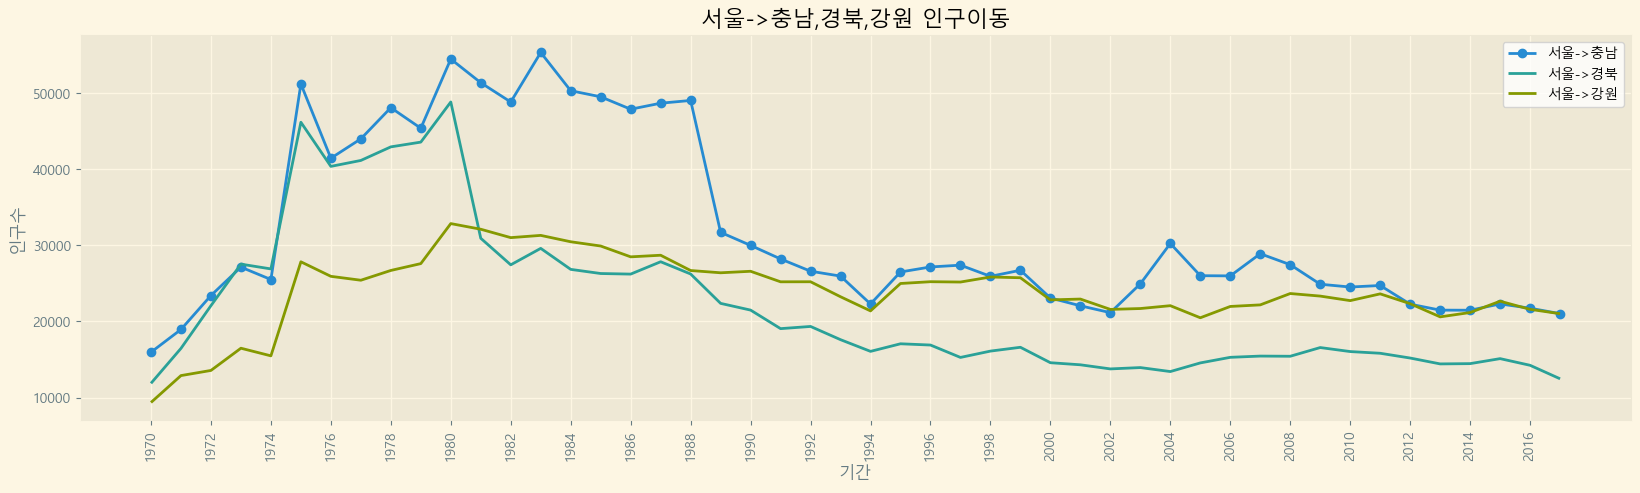

In [31]:
#서울에서 다른지역으로 이동한데이터
mask = (df['전출지별'] == '서울특별시') & (df["전입지별"] != "서울특별시")
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1, inplace=False)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]
# df_3


fig = plt.figure(figsize=(20,5))
ax  = fig.add_subplot(1,1,1)
ax.plot(col_years, df_3.loc['충청남도'],label='서울->충남',marker='o')
ax.plot(col_years, df_3.loc['경상북도'],label='서울->경북')
ax.plot(col_years, df_3.loc['강원도'], label='서울->강원')
ax.legend(loc='best', facecolor='white')
ax.set_title("서울->충남,경북,강원 인구이동")
ax.set_xticklabels([col_years[i] for i in range(0,len(col_years),2)],rotation=90)
ax.set_xticks(range(0,len(col_years), 2))
ax.set_xlabel('기간', size=12)
ax.set_ylabel('인구수', size=12)
plt.show()


In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
